# SGR 1806-20 Giant Flare Shenanigans

Let's play around with the RHESSI light curve of the SGR 1806-20 giant flare from 2004.
I have the light curve in 4 different energy bands. One interesting question is whether there is a periodic signal in all energy bands.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
datadir = "/Users/danielahuppenkothen/work/data/sgr1820/giantflare/"

In [3]:
time1 = np.loadtxt(datadir+"bins_1.dat")
counts1 = np.loadtxt(datadir+"cnts_1.dat")

time2 = np.loadtxt(datadir+"bins_2.dat")
counts2 = np.loadtxt(datadir+"cnts_2.dat")

time3 = np.loadtxt(datadir+"bins_3.dat")
counts3 = np.loadtxt(datadir+"cnts_3.dat")

time4 = np.loadtxt(datadir+"bins_4.dat")
counts4 = np.loadtxt(datadir+"cnts_4.dat")

Ok, cool. Now that we've got the data, let's make a light curve of each and plot:

In [4]:
from stingray import Lightcurve, Powerspectrum

In [5]:
lc1 = Lightcurve(time1, counts1)
lc2 = Lightcurve(time2, counts2)
lc3 = Lightcurve(time3, counts3)
lc4 = Lightcurve(time4, counts4)

<IPython.core.display.Javascript object>


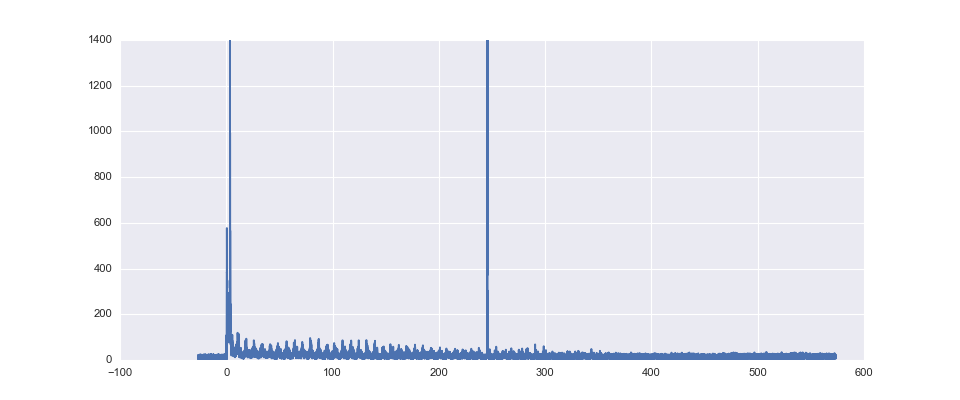

<IPython.core.display.Javascript object>


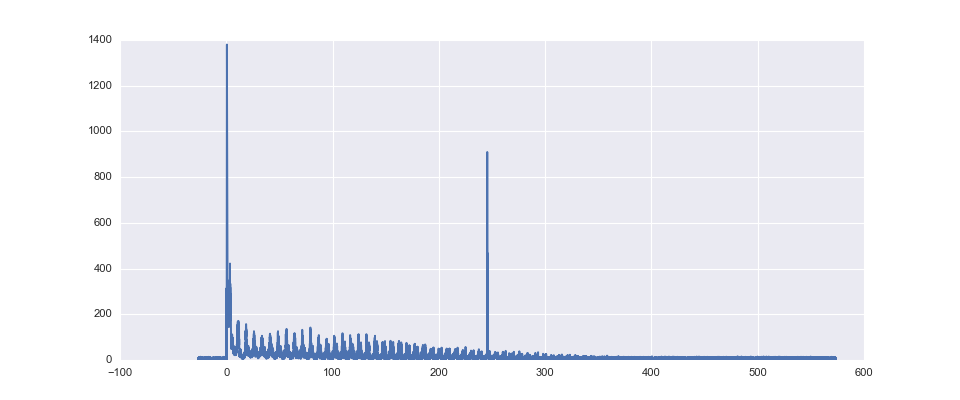

<IPython.core.display.Javascript object>


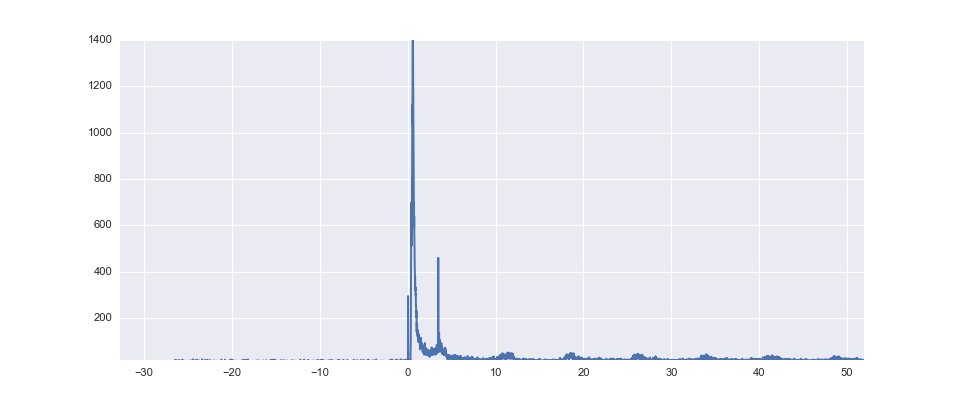

<IPython.core.display.Javascript object>


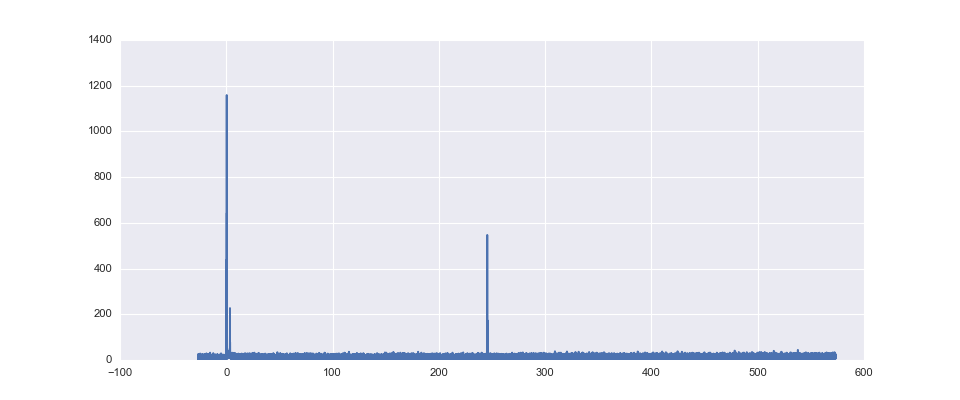

(0, 1400)

In [6]:
plt.figure(figsize=(12,5))
plt.plot(lc1.time, lc1.counts)
plt.ylim(0, 1400)

plt.figure(figsize=(12,5))
plt.plot(lc2.time, lc2.counts)
plt.ylim(0, 1400)

plt.figure(figsize=(12,5))
plt.plot(lc3.time, lc3.counts)
plt.ylim(0, 1400)

plt.figure(figsize=(12,5))
plt.plot(lc4.time, lc4.counts)
plt.ylim(0, 1400)


We're going to cut out the first sharp peak and everything after about 100 seconds:

In [7]:
print(time1)
print(time2)

[ -26.63883652  -26.62883652  -26.61883652 ...,  573.44116348  573.45116348
  573.46116348]
[ -26.63675655  -26.62675655  -26.61675655 ...,  573.43324345  573.44324345
  573.45324345]


In [9]:
tstart = 4.2
tend = tstart + 90.0

start_ind = time1.searchsorted(tstart)
end_ind = time1.searchsorted(tend)

In [10]:
lc1 = lc1.truncate(start_ind, end_ind, method="index")
lc2 = lc2.truncate(start_ind, end_ind, method="index")
lc3 = lc3.truncate(start_ind, end_ind, method="index")
lc4 = lc4.truncate(start_ind, end_ind, method="index")

<IPython.core.display.Javascript object>


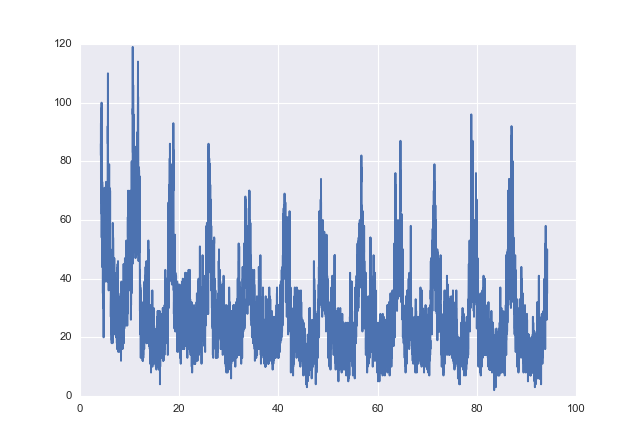

In [11]:
plt.figure()
plt.plot(lc1.time, lc1.counts)

Okay, cool. Let's have a look at the PSD:

In [162]:
ps1 = Powerspectrum(lc1, norm="leahy")
ps2 = Powerspectrum(lc2, norm="leahy")
ps3 = Powerspectrum(lc3, norm="leahy")
ps4 = Powerspectrum(lc4, norm="leahy")

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


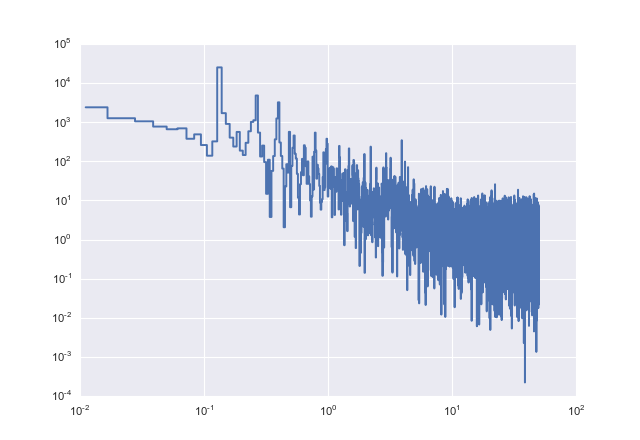

<IPython.core.display.Javascript object>


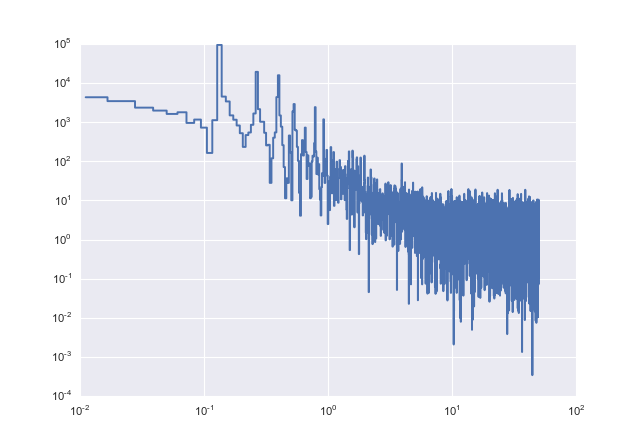

<IPython.core.display.Javascript object>


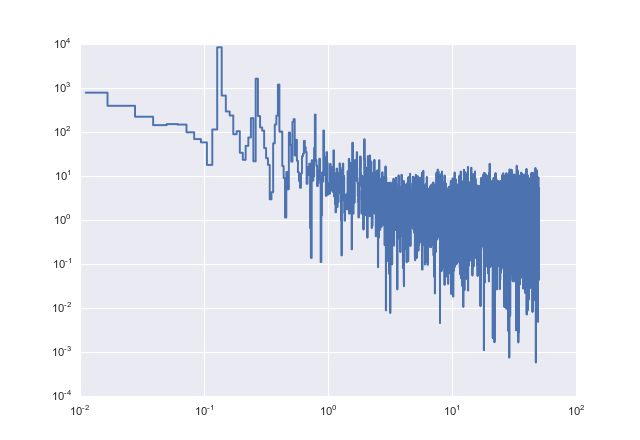

<IPython.core.display.Javascript object>


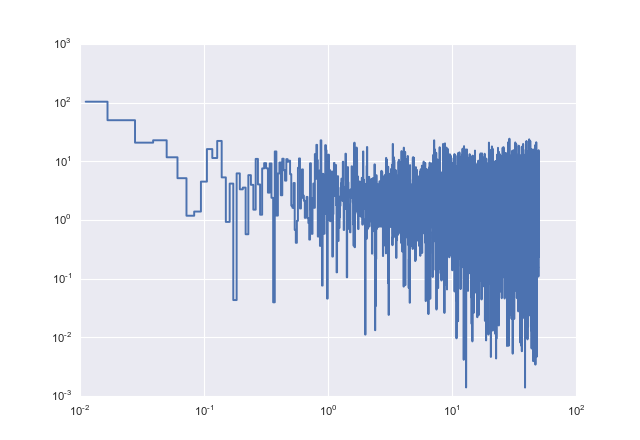

In [163]:
plt.figure()
plt.loglog(ps1.freq, ps1.power, linestyle="steps-mid")

plt.figure()
plt.loglog(ps2.freq, ps2.power, linestyle="steps-mid")

plt.figure()
plt.loglog(ps3.freq, ps3.power, linestyle="steps-mid")

plt.figure()
plt.loglog(ps4.freq, ps4.power, linestyle="steps-mid")



<IPython.core.display.Javascript object>


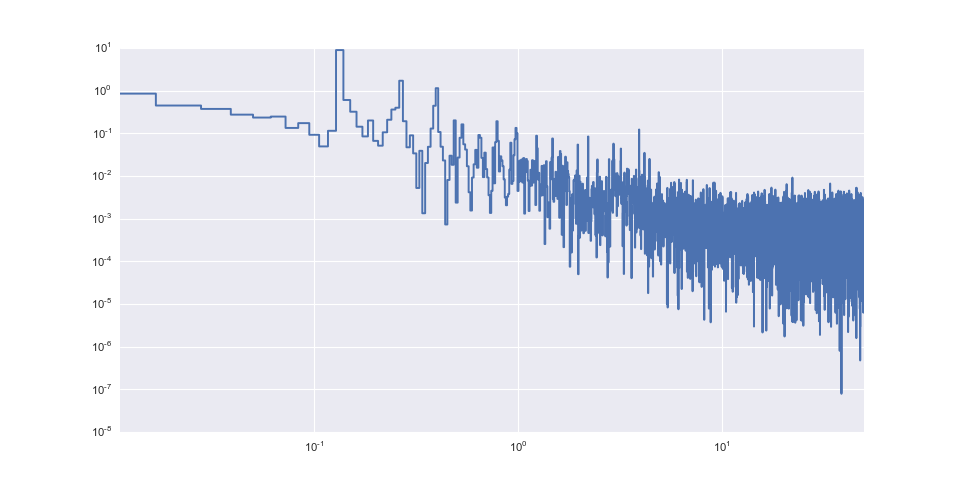

<IPython.core.display.Javascript object>


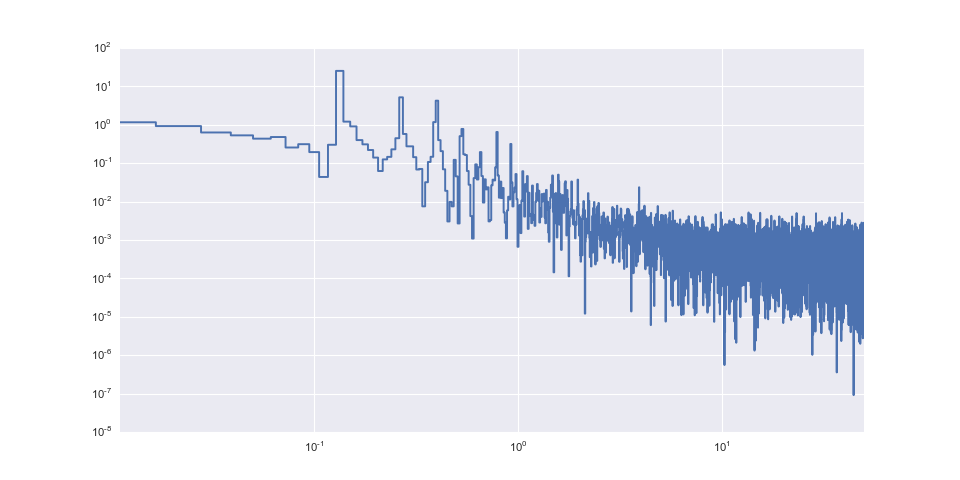

<IPython.core.display.Javascript object>


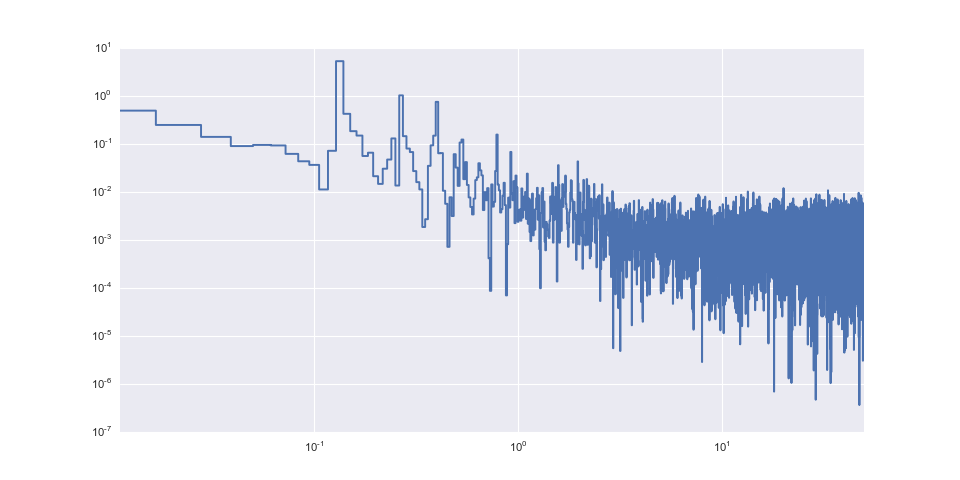

<IPython.core.display.Javascript object>


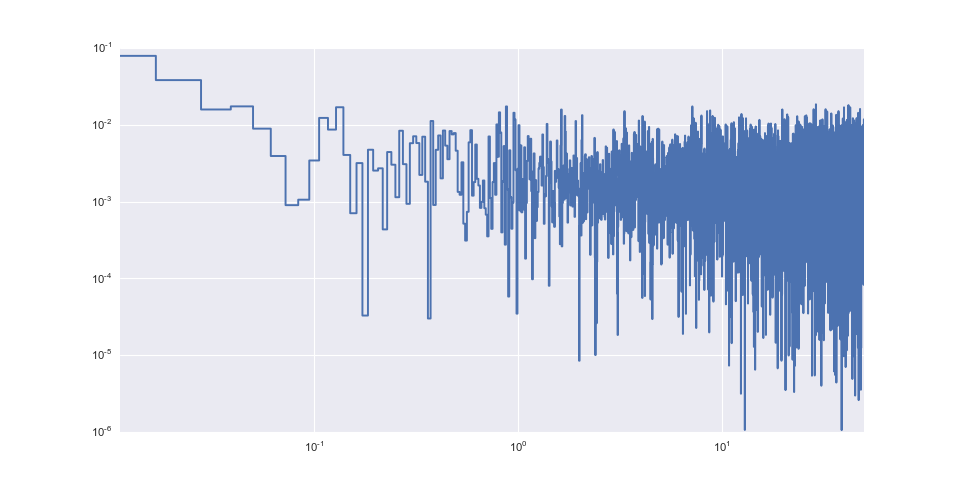

(0.011111111111109375, 49.988888888881078)

In [17]:
plt.figure(figsize=(12,6))
plt.loglog(ps1.freq, ps1.power, linestyle="steps-mid")
plt.xlim(ps1.freq[0], ps1.freq[-1])

plt.figure(figsize=(12,6))
plt.loglog(ps2.freq, ps2.power, linestyle="steps-mid")
plt.xlim(ps2.freq[0], ps2.freq[-1])

plt.figure(figsize=(12,6))
plt.loglog(ps3.freq, ps3.power, linestyle="steps-mid")
plt.xlim(ps3.freq[0], ps3.freq[-1])

plt.figure(figsize=(12,6))
plt.loglog(ps4.freq, ps4.power, linestyle="steps-mid")
plt.xlim(ps4.freq[0], ps4.freq[-1])

Okay, let's rebin the light curves to something coarser:

In [18]:
lc1_bin = lc1.rebin_lightcurve(0.1, method="sum")
lc2_bin = lc2.rebin_lightcurve(0.1, method="sum")
lc3_bin = lc3.rebin_lightcurve(0.1, method="sum")
lc4_bin = lc4.rebin_lightcurve(0.1, method="sum")

print("mean counts per bin: " + str(np.mean(lc1_bin.counts)))
print("mean counts per bin: " + str(np.mean(lc2_bin.counts)))
print("mean counts per bin: " + str(np.mean(lc3_bin.counts)))
print("mean counts per bin: " + str(np.mean(lc4_bin.counts)))


ps1_bin = Powerspectrum(lc1_bin, norm="leahy")
ps2_bin = Powerspectrum(lc2_bin, norm="leahy")
ps3_bin = Powerspectrum(lc3_bin, norm="leahy")
ps4_bin = Powerspectrum(lc4_bin, norm="leahy")


mean counts per bin: 281.847946726
mean counts per bin: 373.450500556
mean counts per bin: 158.14
mean counts per bin: 131.384017758


Fudge uncertainty by assuming Gaussian errors. Probably not too bad, given that there are several hundred counts per bin.

In [19]:
lc1_uncertainty = np.sqrt(lc1_bin.counts)
lc2_uncertainty = np.sqrt(lc2_bin.counts)
lc3_uncertainty = np.sqrt(lc3_bin.counts)
lc4_uncertainty = np.sqrt(lc4_bin.counts)

Save binned light curve to file with uncertainties:

In [20]:
np.savetxt(datadir+"rhessi_lc1_binned.txt", np.array([lc1_bin.time, lc1_bin.counts, lc1_uncertainty]).T)
np.savetxt(datadir+"rhessi_lc2_binned.txt", np.array([lc2_bin.time, lc2_bin.counts, lc2_uncertainty]).T)
np.savetxt(datadir+"rhessi_lc3_binned.txt", np.array([lc3_bin.time, lc3_bin.counts, lc3_uncertainty]).T)
np.savetxt(datadir+"rhessi_lc4_binned.txt", np.array([lc4_bin.time, lc4_bin.counts, lc4_uncertainty]).T)

# A hierarchical model for the Power spectrum

We're going to write down a hierarachical model for the power spectra in different energy bands. 

The power spectrum will be modeled as a superposition of $K$ Lorentzians and a power law (might extend to a broken power law later). The power law parameter $\Lambda$ **will be the same** for each energy bin, the amplitude $A_{\mathrm{pl}}$ can be different. 
Each Lorentzian has three parameters: frequency $\nu$, width $w$ and amplitude $A$. The frequencies must be the same across different energy bands, thus there is only one parameter for all energy bands. Furthermore, we assume that all Lorentzians model either the fundamental or a harmonic, thus the $K$ Lorentzians will be spaced in multiples of $\nu$. 
The width of the Lorentzians will also be the same across energy bands, with one width for each Lorentzian. 
Finally, the amplitudes for each Lorentzian are deterministically related across energy bands by a simple linear function $f(A) = a*A + b$, where $a$ denotes a slope and $b$ a normalization. The slope must be the same for all Lorentzians, while $b$ is allowed to vary for each harmonic.

Finally, there's a parameter $c$ modeling the constant white noise level. 

In the first instance, the value of $K$ is fixed, though we could infer this as well in the future. 

### Priors


In [21]:
# period of SGR 1806-20
period = 7.547732

# frequency of SGR 1806-20 rotation
nu0 = 1. / period

# number of power spectra
nn = 4

# number of Lorentzians 
kk = 16



In [22]:
import scipy.stats

In [23]:
# really small value in case my log-prior becomes not finite
logmin = -10000000000000.0

def logprior(theta):
    # prior on the frequency of the fundamental
    nu = theta[0]
    nu_mean_hyper = nu0
    nu_std_hyper = 0.01
    logp_nu = scipy.stats.norm(nu_mean_hyper, nu_std_hyper).logpdf(nu)
    
    # prior the slope of the linear relationship between QPO amplitudes
    #slope = theta[1]
    #slope_lower_hyper = -2.0
    #slope_width_hyper = 4.0
    #logp_slope = scipy.stats.uniform(loc=slope_lower_hyper, scale=slope_width_hyper).logpdf(slope)

    # prior on the position of the Gaussian for the amplitude relationship
    mean_energy = theta[1]
    mean_lower_hyper = 20.0
    mean_upper_hyper = 16000.0-20.0
    logp_mean_energy = scipy.stats.uniform(loc=mean_lower_hyper, scale=mean_upper_hyper).logpdf(mean_energy)
    
    logwidth_energy = theta[2]
    logwidth_lower_hyper = np.log(10.0)
    logwidth_upper_hyper = np.log(10000.0)
    logp_logwidth_energy = scipy.stats.uniform(loc=logwidth_lower_hyper, 
                                               scale=logwidth_upper_hyper).logpdf(logwidth_energy)

    
    # prior on the power law index of the underlying broadband PSD
    gamma = theta[3]
    gamma_lower_hyper = 0.
    gamma_width_hyper = 5.
    logp_gamma = scipy.stats.uniform(loc=gamma_lower_hyper, scale=gamma_width_hyper).logpdf(gamma)
    
    # prior on the log-amplitudes; different for each energy bin 
    logamp_all = theta[4:4+nn]
    logamp_lower_hyper = -10.0
    logamp_width_hyper = 20.0
    logp_logamp = 0.0
    for logamp in logamp_all:
        logp_logamp += scipy.stats.uniform(loc=logamp_lower_hyper, scale=logamp_width_hyper).logpdf(logamp)


    # prior on the white noise level; different for all spectra
    bkg_all = theta[4+nn:4+2*nn]
    bkg_mean_hyper = 2.0
    bkg_std_hyper = 0.1
    logp_bkg = 0.0
    for bkg in bkg_all:
        logp_bkg += scipy.stats.norm(bkg_mean_hyper, bkg_std_hyper).logpdf(bkg)

    # prior on the q-values of the QPOs; one for each harmonic
    qval_all = theta[4+2*nn:4+2*nn+kk]
    qval_lower_hyper = 2.0
    qval_width_hyper = 48.0
    logp_qval = 0.0
    for qval in qval_all:
        logp_qval += scipy.stats.uniform(loc=qval_lower_hyper, scale=qval_width_hyper).logpdf(qval)

    # prior on the log-amplitudes of the harmonics; one for each harmonic
    logb_all = theta[4+2*nn+kk:4+2*nn+2*kk]
    logb_lower_hyper = -20.0
    logb_width_hyper = 40.0
    logp_logb = 0.0
    for logb in logb_all:
        logp_logb += scipy.stats.uniform(loc=logb_lower_hyper, scale=logb_width_hyper).logpdf(logb)
        
    # combine all priors:
    #logprior = logp_nu + logp_slope + logp_gamma + logp_logamp + logp_bkg + logp_qval + logp_logb
    logprior = logp_nu + logp_mean_energy + logp_logwidth_energy + \
                logp_gamma + logp_logamp + logp_bkg + logp_qval + logp_logb
    
    
    # if prior is not finite, replace by very small (= unlikely) value:
    if not np.isfinite(logprior):
        return logmin
    else:
        return logprior
    

Okay, let's now define our actual model to make a model power spectrum:

In [24]:
def lorentzian(x, x0, q, amplitude):
    """
    Lorentzian profile commonly used for fitting QPOs.

    Parameters:
    -----------
    x: numpy.ndarray
        The independent variable
    x0: float
        The position of the centroid of the Lorentzian profile
    q: float
        Q-factor of the Lorentzian, parametrizing the width as q = x0/width
    amplitude: float
        The height or amplitude of the Lorentzian profile
    """

    gamma = x0/q
    #amplitude = np.exp(amplitude)

    alpha = 0.5 * amplitude / (gamma * np.pi)
    y = alpha / ((x - x0)**2.0 + (0.5 * gamma)**2.0)
    return y

def powerlaw(x, alpha, amplitude, c):
    """
    Power law model of the form

        $y(x) = A x^\alpha$

    where $A$ is the amplitude and $\alpha$ the power law index.

    Parameters:
    -----------
    x: numpy.ndarray
        The independent variable
        
    alpha: float
        The  power law index
        
    amplitude: float
        The *logarithm* of the normalization or amplitude of the power law
        
    c : float
        The constant background level (Poisson noise level of the power spectrum)

    Returns:
    --------
    model: numpy.ndarray
        The power law model for all values in x.
    """

    res = -alpha*np.log(x) + amplitude
    return np.exp(res) + c


Now we can actually construct the function that will compute the mean model. We'll need the energies of the bins used; we're going to use the mid-bin energies (which is probably a crappy assumption, but will do for the moment):

1. 0 - 40 keV
2. 40 - 80 keV
3. 80 - 250 keV
4. 250 - 16000 keV



In [25]:
energies = np.array([20.0, 60.0, 165.0, 8125.0])

In [26]:
def mean_model(freq, energies, kk, theta):
    nn = energies.shape[0] # number of energy bins
    
    # get out the parameters
    nu = theta[0]
    #slope = theta[1]
    mean_energy = theta[1]
    width_energy = theta[2]
    
    gamma = theta[3]
    
    logamp_all = theta[4:4+nn]
    bkg_all = theta[4+nn:4+2*nn]
    qval_all = theta[4+2*nn:4+2*nn+kk]
    logb_all = theta[4+2*nn+kk:4+2*nn+2*kk]
    
    # construct an empty matrix for the model spectra, 
    # rows are spectra, columns are frequency bins
    model_spec = np.zeros((nn, freq.shape[0]))
    
    # compute the power laws first:
    for i, (logamp, bkg) in enumerate(zip(logamp_all, bkg_all)):
        model_spec[i] += powerlaw(freq, gamma, logamp, bkg)
        
    # now compute Lorentzians and add those:
    for i, en in enumerate(energies):
        for j, (qval, logb) in enumerate(zip(qval_all, logb_all)):
            #print("energy: " + str(en))
            # compute amplitude using linear function
            #lor_a = np.exp(logb + slope*np.log(en))
            #print("mean_energy: " + str(mean_energy))
            #print("width_energy: " + str(width_energy))
            lor_a = np.exp(logb)*scipy.stats.norm(loc=mean_energy, 
                                                  scale=np.exp(width_energy)).pdf(en)
            #print(lor_a)
            # add Lorentzian to spectrum
            model_spec[i,:] += lorentzian(freq, nu0*(j+1), qval, lor_a)
            
    return model_spec

Let's test it:

In [27]:
nu = nu0
#slope = -0.75
mean_energy = 40.0
width_energy = np.log(50.0)
gamma = 1.0
logamp_all = [1.5, 2.0, -0.2, -1.5]
bkg_all = [2.0, 2.0, 2.0, 2.0]
qval_all = np.ones(kk)*40.0
logb_all = np.ones(kk)*-1.5


#theta_test = np.hstack([nu, slope, gamma, logamp_all, bkg_all, qval_all, logb_all])
theta_test = np.hstack([nu, mean_energy, width_energy, gamma, logamp_all, bkg_all, qval_all, logb_all])




In [28]:
mm = mean_model(ps1.freq, energies, kk, theta_test)

In [29]:
len(ps4.freq)

4499

<IPython.core.display.Javascript object>


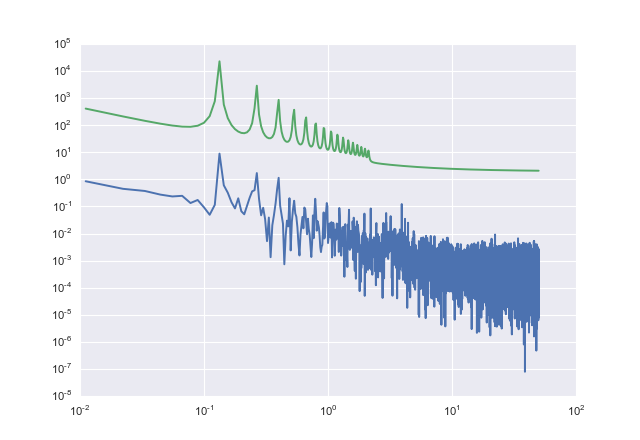

<IPython.core.display.Javascript object>


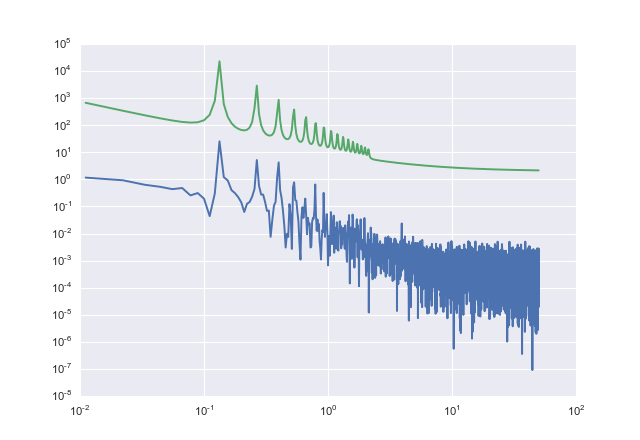

<IPython.core.display.Javascript object>


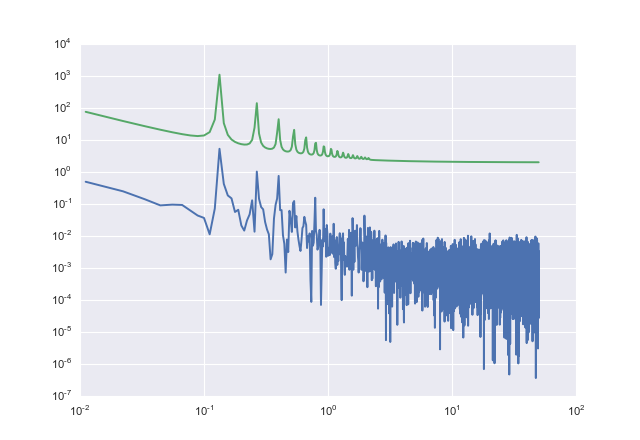

<IPython.core.display.Javascript object>


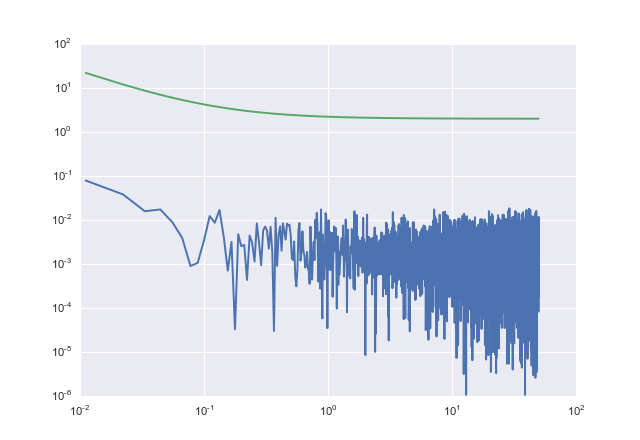

In [30]:
plt.figure()
plt.loglog(ps1.freq, ps1.power)
plt.loglog(ps1.freq, mm[0])

plt.figure()
plt.loglog(ps1.freq, ps2.power)
plt.loglog(ps1.freq, mm[1])

plt.figure()
plt.loglog(ps1.freq, ps3.power)
plt.loglog(ps1.freq, mm[2])

plt.figure()
plt.loglog(ps1.freq, ps4.power)
plt.loglog(ps1.freq, mm[3])




That looks like a pretty good model! Now all we have to do is define likelihood and posterior, and we can sample:

In [31]:

class PSDPosterior(object):
    
    def __init__(self, ps_all, energies, kk=5):
        
        # list of all power spectra objects
        self.ps_all = ps_all
        
        # associated energy bins
        self.energies = energies
        
        # the number of Lorentzians to be fit
        self.kk = kk
        
        # number of spectra
        self.nn = self.energies.shape[0]
        
        return
    
    def logprior(self, t0):
        return logprior(t0)
    
    def loglikelihood(self, t0, neg=False):
        """
        The log-likelihood for the model defined in self.model
        and the parameters in t0. Uses a $\Chi^2$ model for
        the uncertainty.

        Parameters:
        ------------
        t0: {list | numpy.ndarray}
            The list with parameters for the model

        Returns:
        --------
        logl: float
            The logarithm of the likelihood function for the model and
            parameters given.

        """

        # all mean models
        funcval_all = mean_model(self.ps_all[0].freq, self.energies, self.kk, t0)

        # initialize log-likelihood
        res = 0.0

        # run through all spectra and add log-likelihoods
        for i, (f, ps) in enumerate(zip(funcval_all, self.ps_all)):
            y = ps.power
            res += -np.sum(np.log(f)) - np.sum(y/f)


        if not np.isfinite(res):
            res = logmin

        if neg:
            return -res
        else:
            return res
    
    def logposterior(self, t0, neg=False):
        #print("logprior: " + str(self.logprior(t0)))
        #print("loglikelihood: " + str(self.loglikelihood(t0)))
        lpost = self.loglikelihood(t0) + self.logprior(t0)
        if neg is True:
            return -lpost
        else:
            return lpost

    def __call__(self, t0, neg=False):
        return self.logposterior(t0, neg=neg)



In [32]:
ps_all = [ps1, ps2, ps3, ps4]

In [33]:
lpost = PSDPosterior(ps_all, energies, kk)

In [34]:
lpost(theta_test)

-15425.221616675473

This seems to work! Optimization time:

In [35]:
import scipy.optimize
opt = scipy.optimize.minimize(lpost, theta_test,
                              method="BFGS",
                              args=(True), tol=1.e-10)


In [36]:
opt.x

array([  0.13249013,  40.        ,   3.91202301,   1.        ,
         1.5       ,   2.        ,  -0.2       ,  -1.5       ,
         2.        ,   2.        ,   2.        ,   2.        ,
        40.        ,  40.        ,  40.        ,  40.        ,
        40.        ,  40.        ,  40.        ,  40.        ,
        40.        ,  40.        ,  40.        ,  40.        ,
        40.        ,  40.        ,  40.        ,  40.        ,
        -1.5       ,  -1.5       ,  -1.5       ,  -1.5       ,
        -1.5       ,  -1.5       ,  -1.5       ,  -1.5       ,
        -1.5       ,  -1.5       ,  -1.5       ,  -1.5       ,
        -1.5       ,  -1.5       ,  -1.5       ,  -1.5       ])

In [37]:
np.sqrt(np.diag(opt.hess_inv))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.])

In [38]:
mm = mean_model(ps1.freq, energies, kk, opt.x)

<IPython.core.display.Javascript object>


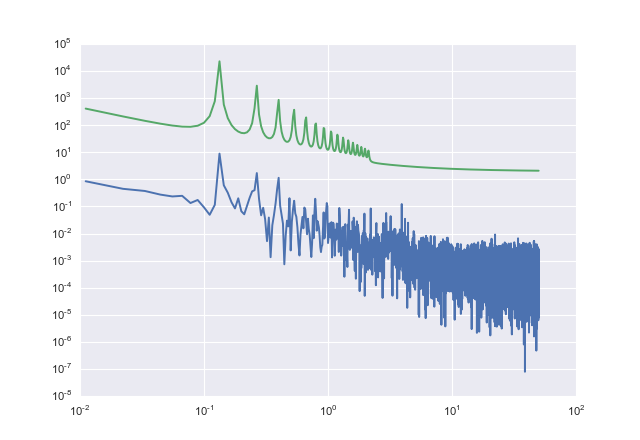

<IPython.core.display.Javascript object>


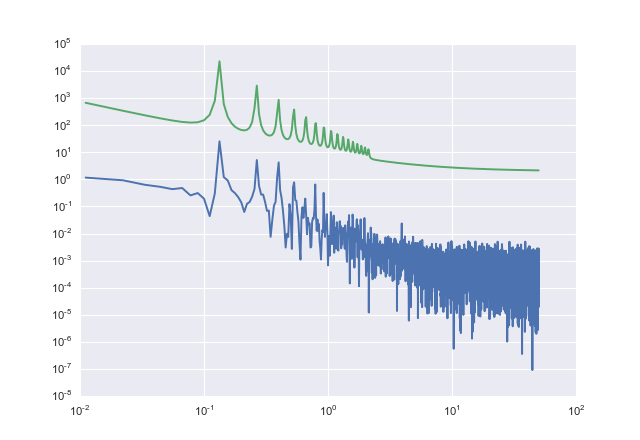

<IPython.core.display.Javascript object>


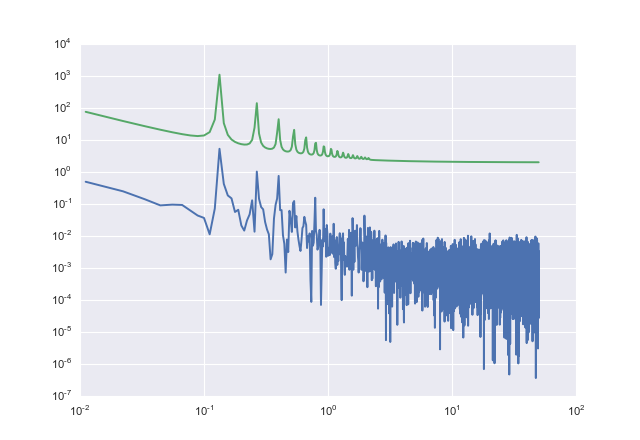

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


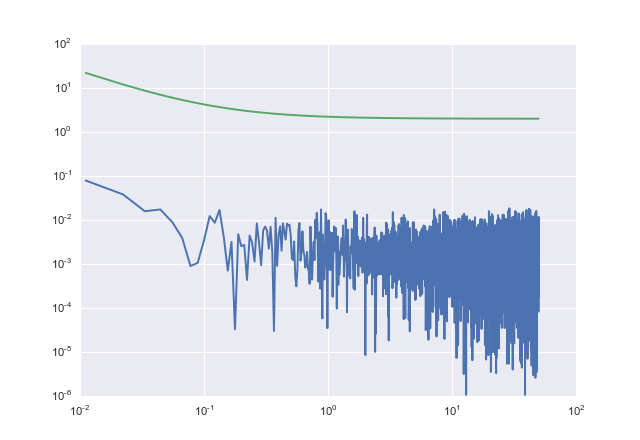

In [39]:
for (ps, m) in zip(ps_all, mm):
    plt.figure()
    plt.loglog(ps.freq, ps.power)
    plt.loglog(ps.freq, m)


MCMC time:

In [40]:
import emcee

In [ ]:

ndim = len(theta_test)
nwalkers = 500
burnin = 200
niter = 200

# sample random starting positions for each walker from
# a multivariate Gaussian
p0 = np.array([np.random.multivariate_normal(opt.x, opt.hess_inv) for
               i in range(nwalkers)])

# initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, lpost, args=[False],
                                threads=4)

# run the burn-in
pos, prob, state = sampler.run_mcmc(p0, burnin)

sampler.reset()

# do the actual MCMC run
_, _, _ = sampler.run_mcmc(pos, niter, rstate0=state)



In [ ]:
np.nanmean(sampler.acceptance_fraction)

In [ ]:
sampler.flatchain.shape

In [ ]:
for i in range(ndim):
    plt.figure(figsize=(12,5))
    plt.plot(sampler.flatchain[:,i])

In [ ]:
import corner

In [ ]:
corner.corner(sampler.flatchain);

In [ ]:
plt.figure()
sns.distplot(sampler.flatchain[:,1], norm_hist=True)
plt.xlabel("Power law index of amplitude")


Let's plot some examples:

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(12,3))
for (ps, ax) in zip(ps_all, axes):
    ax.loglog(ps.freq, ps.power)


samples_ind = np.random.choice(np.arange(len(sampler.flatchain)), size=200, replace=False)

for s in samples_ind:
    mm = mean_model(ps1.freq, energies, 5, sampler.flatchain[s,:])
    
    for (m, ax) in zip(mm, axes):
        ax.plot(ps1.freq, m, color=sns.color_palette()[2], alpha=0.05)


TO DO:
- make a constant amplitude model and a varying amplitude model with the different photon numbers in the different light curves, simulate and see if I can pick up this effect or whether the fact that I have fewer photons at higher energies screws me up!
- I am worried that using Leahy normalization screws me up: at higher energies, I have fewer photons, so that any QPOs could effectively be "hidden" in the noise. I need to make sure that my model is sensitive to this! So:
    - simulate light curves with a (1) a constant amplitude for the QPOs, (2) a variable amplitude for the QPOs
    - for the different energies, re-normalize the light curves by the count rates in the different energies for the observed data
    - sample photons
    - run the analysis for the simulated data
    - does the model constrain the amplitude relationship correctly?
- finish CARMA modeling 

## Simulating Light Curves

We'll use the real light curve to figure out whether I get screwed by the fact that I have different numbers of photons
- smooth the 40-80 keV light curve
- resample with original resolution
- re-normalize light curve to total number of photons in each band
- pick photons for each bin
- run the model and see whether it still picks out the right relationship

Let's start with smoothing the light curve:


In [120]:
lc2_bin = lc2.rebin_lightcurve(0.1)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


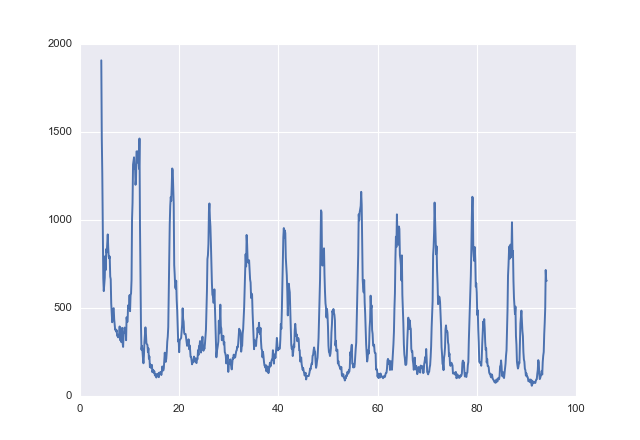

In [121]:
plt.figure()
plt.plot(lc2_bin.time, lc2_bin.counts)

In [91]:
import scipy.interpolate

Cubic interpolation makes sure there are no hard edges:

In [122]:
f = scipy.interpolate.interp1d(lc2_bin.time, lc2_bin.countrate, kind="cubic")

In [218]:
import copy
lc2_smooth = copy.copy(lc2)

min_ind = lc2_smooth.time.searchsorted(lc2_bin.time[0])
max_ind = lc2_smooth.time.searchsorted(lc2_bin.time[-1])

lc2_smooth.time = lc2_smooth.time[min_ind:max_ind]
lc2_smooth.counts = lc2_smooth.counts[min_ind:max_ind]
lc2_smooth.countrate = lc2_smooth.countrate[min_ind:max_ind]
lc2_smooth.n = len(lc2_smooth.time)

We'll also make the power spectra again from the shortened light curve, for use further down below:

In [219]:
lc1_short = copy.deepcopy(lc1)
lc1_short.time = lc1_short.time[min_ind:max_ind]
lc1_short.counts = lc1_short.counts[min_ind:max_ind]
lc1_short.countrate = lc1_short.countrate[min_ind:max_ind]
lc1_short.nn = len(lc1_short.time)
ps1_short = Powerspectrum(lc1_short, norm="leahy")

lc2_short = copy.deepcopy(lc2)
lc2_short.time = lc2_short.time[min_ind:max_ind]
lc2_short.counts = lc2_short.counts[min_ind:max_ind]
lc2_short.countrate = lc2_short.countrate[min_ind:max_ind]
lc2_short.nn = len(lc2_short.time)
ps2_short = Powerspectrum(lc2_short, norm="leahy")

lc3_short = copy.deepcopy(lc3)
lc3_short.time = lc3_short.time[min_ind:max_ind]
lc3_short.counts = lc3_short.counts[min_ind:max_ind]
lc3_short.countrate = lc3_short.countrate[min_ind:max_ind]
lc3_short.nn = len(lc3_short.time)
ps3_short = Powerspectrum(lc3_short, norm="leahy")

lc4_short = copy.deepcopy(lc4)
lc4_short.time = lc4_short.time[min_ind:max_ind]
lc4_short.counts = lc4_short.counts[min_ind:max_ind]
lc4_short.countrate = lc4_short.countrate[min_ind:max_ind]
lc4_short.nn = len(lc4_short.time)
ps4_short = Powerspectrum(lc4_short, norm="leahy")

ps_short_all = [ps1_short, ps2_short, ps3_short, ps4_short]



In [124]:
lc2_smooth.countrate = f(lc2_smooth.time)
lc2_smooth.counts = lc2_smooth.countrate*lc2.dt

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


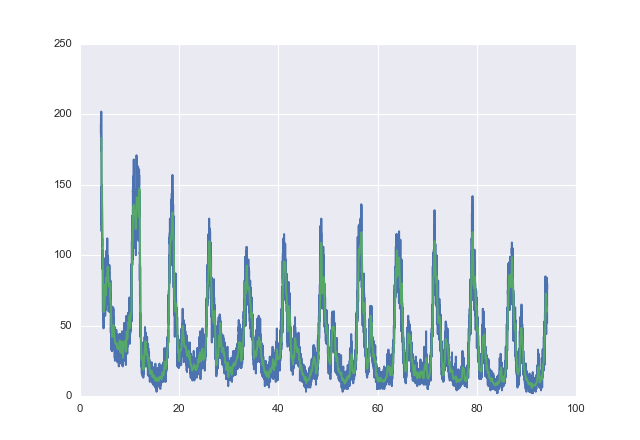

In [125]:
plt.figure()
plt.plot(lc2.time, lc2.counts)
plt.plot(lc2_smooth.time, lc2_smooth.counts)

Now we can re-scale the flux to the total number of photons. First, let's normalize the model by dividing the total number of photons in the 40-80 keV light curve:

In [126]:
lc2_smooth.counts /= np.sum(lc2.counts)

In [127]:
lc2_smooth.countrate /= np.sum(lc2.counts)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


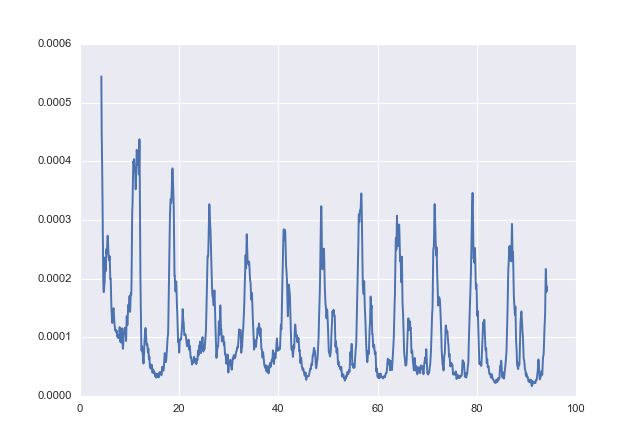

In [128]:
plt.figure()
plt.plot(lc2_smooth.time, lc2_smooth.counts)

In [165]:
lc1_sim = copy.deepcopy(lc2_smooth)

In [166]:
lc2_sim = copy.deepcopy(lc2_smooth)

In [167]:
lc3_sim = copy.deepcopy(lc2_smooth)

In [168]:
lc4_sim = copy.deepcopy(lc2_smooth)

We've got the values for the total source spectrum and background spectrum in all four energy bins:

In [169]:
bkg1 = 40413.0
src1 = 172702.0 - bkg1

bkg2 = 40423.0
src2 = 306366.0 - bkg2

bkg3 = 68211.0
src3 = 116198.0 - bkg3

bkg4 = 85334.0
src4 = 92371.0 - bkg4

We also need a multiplicative factor that changes the amplitude of the pulse profile as a function of energy:

In [170]:
lc1_sim.counts = lc1_sim.counts*src1 + bkg1/lc1_sim.n
lc1_sim.countrate = lc1_sim.counts/lc1_sim.dt

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


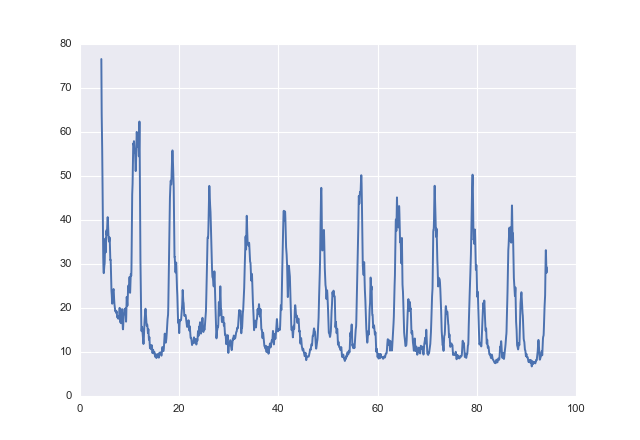

In [171]:
plt.figure()
plt.plot(lc1_sim.time, lc1_sim.counts)


Second energy bin:

In [172]:
lc2_sim.counts = lc2_sim.counts*src2 + bkg2/lc2_sim.n
lc2_sim.countrate = lc2_sim.counts/lc2_sim.dt

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


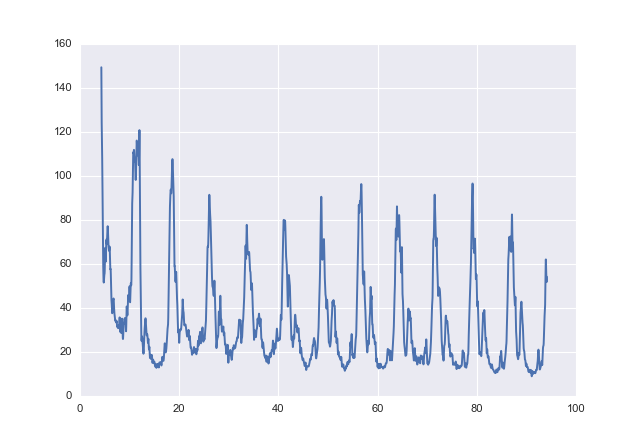

In [173]:
plt.figure()
plt.plot(lc2_sim.time, lc2_sim.counts)

Third energy bin:

In [174]:
lc3_sim.counts = lc3_sim.counts*src3 + bkg3/lc3_sim.n
lc3_sim.countrate = lc3_sim.counts/lc3_sim.dt

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


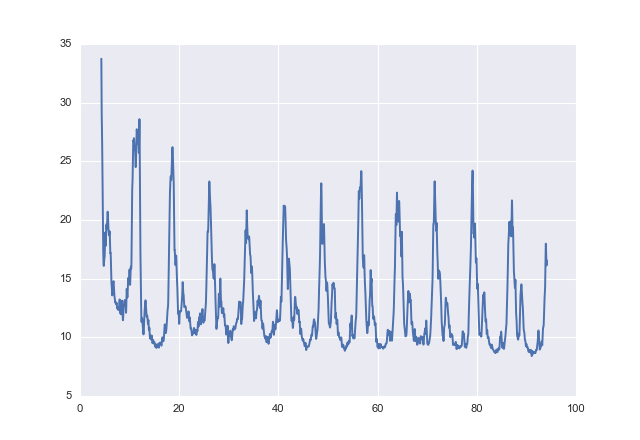

In [175]:
plt.figure()
plt.plot(lc3_sim.time, lc3_sim.counts)

Fourth energy bin:

In [176]:
lc4_sim.counts = lc4_sim.counts*src4 + bkg4/lc4_sim.n
lc4_sim.countrate = lc4_sim.counts/lc4_sim.dt

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


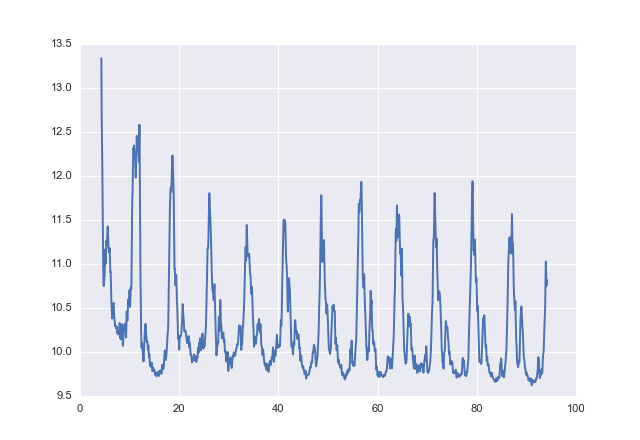

In [177]:
plt.figure()
plt.plot(lc4_sim.time, lc4_sim.counts)

Okay, now let's simulate by picking from a Poisson distribution. I'm pretty sure it's already clear that even at the highest energies there should be a pulse profile visible, though I don't know whether there is any background we need to worry about at high energies.

Let's also add a background of ~15 counts/bin to the light curve, based on eye-balling the data:

In [178]:
#lc1_sim.counts = np.random.poisson(lc1_sim.counts)
#lc1_sim.countrate = lc1_sim.counts/lc1_sim.dt

#lc2_sim.counts = np.random.poisson(lc2_sim.counts)
#lc2_sim.countrate = lc2_sim.counts/lc2_sim.dt

#lc3_sim.counts = np.random.poisson(lc3_sim.counts)
#lc3_sim.countrate = lc3_sim.counts/lc3_sim.dt

#lc4_sim.counts = np.random.poisson(lc4_sim.counts)
#lc4_sim.countrate = lc4_sim.counts/lc4_sim.dt

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


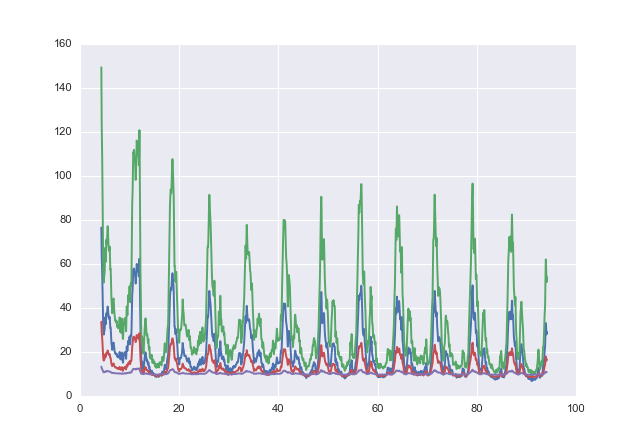

In [179]:
plt.figure()
plt.plot(lc1_sim.time, lc1_sim.counts)
plt.plot(lc2_sim.time, lc2_sim.counts)
plt.plot(lc3_sim.time, lc3_sim.counts)
plt.plot(lc4_sim.time, lc4_sim.counts)

Let's make power spectra:

In [180]:
ps1_sim = Powerspectrum(lc1_sim, norm="leahy")
ps2_sim = Powerspectrum(lc2_sim, norm="leahy")
ps3_sim = Powerspectrum(lc3_sim, norm="leahy")
ps4_sim = Powerspectrum(lc4_sim, norm="leahy")

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


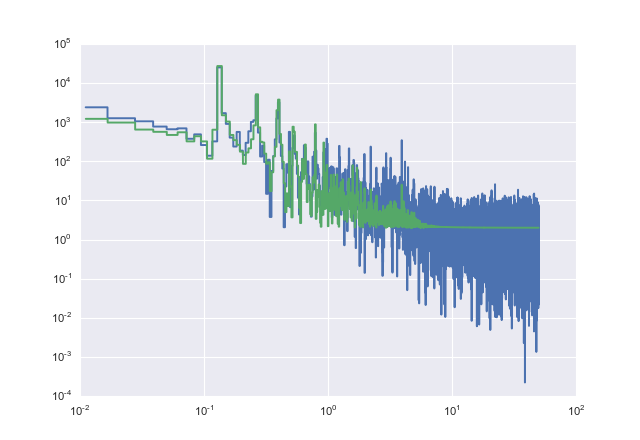

<IPython.core.display.Javascript object>


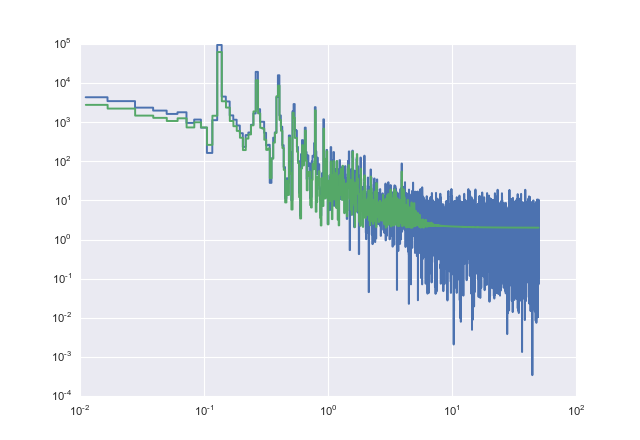

<IPython.core.display.Javascript object>


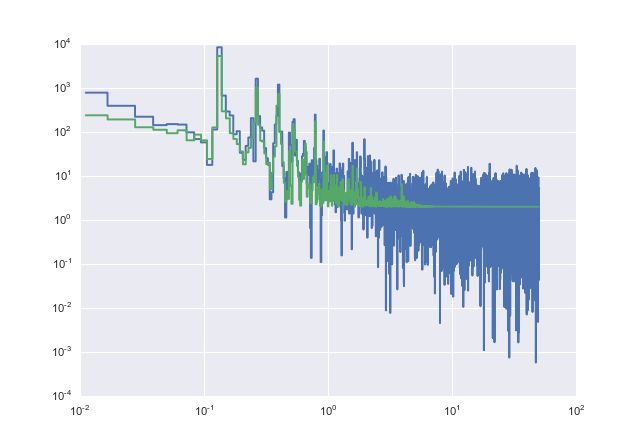

<IPython.core.display.Javascript object>


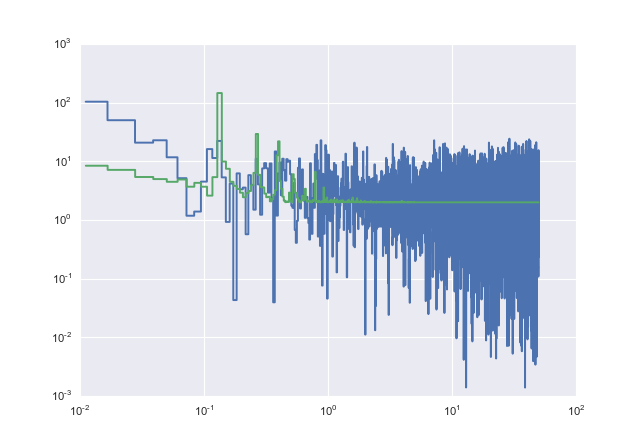

In [183]:
plt.figure()
plt.loglog(ps1.freq, ps1.power, linestyle="steps-mid")
plt.loglog(ps1_sim.freq, ps1_sim.power+2.0, linestyle="steps-mid")

plt.figure()
plt.loglog(ps2.freq, ps2.power, linestyle="steps-mid")
plt.loglog(ps2_sim.freq, ps2_sim.power+2.0, linestyle="steps-mid")

plt.figure()
plt.loglog(ps3.freq, ps3.power, linestyle="steps-mid")
plt.loglog(ps3_sim.freq, ps3_sim.power+2.0, linestyle="steps-mid")

plt.figure()
plt.loglog(ps4.freq, ps4.power, linestyle="steps-mid")
plt.loglog(ps4_sim.freq, ps4_sim.power+2.0, linestyle="steps-mid")

Let's use this as an actual model to fit the power spectrum. First, let's make a function that takes the data and makes a set of model PSDs:

In [196]:
def make_template(lc, rebin_fac=0.1):
    # rebin light curve
    lc_bin = lc.rebin_lightcurve(0.1)
    
    # cubic spine interpolation between bins
    f = scipy.interpolate.interp1d(lc_bin.time, lc_bin.countrate, kind="cubic")
    
    # template for the smooth light curve
    lc_smooth = copy.copy(lc)

    # find inde of first and last bin in smoothed light curve to be used
    min_ind = lc_smooth.time.searchsorted(lc_bin.time[0])
    max_ind = lc_smooth.time.searchsorted(lc_bin.time[-1])

    # reset time, counts and countrate attributes
    lc_smooth.time = lc_smooth.time[min_ind:max_ind]
    lc_smooth.counts = lc_smooth.counts[min_ind:max_ind]
    lc_smooth.countrate = lc_smooth.countrate[min_ind:max_ind]
    lc_smooth.n = len(lc_smooth.time)
    
    lc_smooth.countrate = f(lc_smooth.time)
    lc_smooth.counts = lc_smooth.countrate*lc.dt
    
    lc_smooth.counts /= np.sum(lc.counts)
    lc_smooth.countrate /= np.sum(lc.counts)
    
    return lc_smooth

In [207]:
def model_psd(lc, counts, bkg_counts, amplitudes, rebin_fac=0.1, norm="leahy"):
    """
    Model the set of power spectra from the SGR 1806-20 giant flare.
    
    Parameters
    ----------
    lc : stingray.Lightcurve object
        The light curve to use as a template.
        
    counts : iterable
        The number of total *source* counts in each energy bin (background-subtracted)
        
    bkg_counts : iterable
        The number of total *background* counts in each energy bin
        
    amplitudes : iterable
        Additional multiplicative factors for the pulse profile in each energy bin 
        
    rebin_fac : float
        The rebin factor to make the interpolated model light curve. 
        This is the new time resolution *in seconds*. 
        Note: must be *larger* than `lc.dt`, i.e. we cannot oversample!
        
    norm : str
        Any of the `stingray.Powerspectrum` normalizations
        
    Returns
    -------
    ps_all : iterable of stingray.Powerspectrum objects
        The list of model power spectra, one for each energy bin
    
    """
    # make smoothed version of light curve
    lc_smooth = make_template(lc, rebin_fac=rebin_fac)
    
    # make copies of the light curve for the new simulations:
    nbins = len(counts)
    lc_sim_all = []
    for i in range(nbins):
        lc_sim_all.append(copy.deepcopy(lc_smooth))
    
    # re-normalize by number of photons and background:
    for lc, cts, bkg, a in zip(lc_sim_all, counts, bkg_counts, amplitudes):
        lc.counts = lc.counts*cts*a + bkg/lc.n
        lc.countrate = lc.counts/lc.dt

    # make power spectra
    ps_all = []
    for lc in lc_sim_all:
        ps_sim = Powerspectrum(lc, norm=norm)
        ps_sim.power += 2.0
        ps_all.append(ps_sim)
        
    return ps_all

Let's take the explicit values for background and source counts from above and stick them in arrays we can use:

In [208]:
counts = [src1, src2, src3, src4]
bkg_counts = [bkg1, bkg2, bkg3, bkg4]

For now, my multiplicative factor for the amplitudes is 1:

In [209]:
amplitudes = [1., 1., 1., 1.]

In [210]:
ps_sim_all = model_psd(lc2, counts, bkg_counts, amplitudes)

In [211]:
ps_all = [ps1, ps2, ps3, ps4]

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


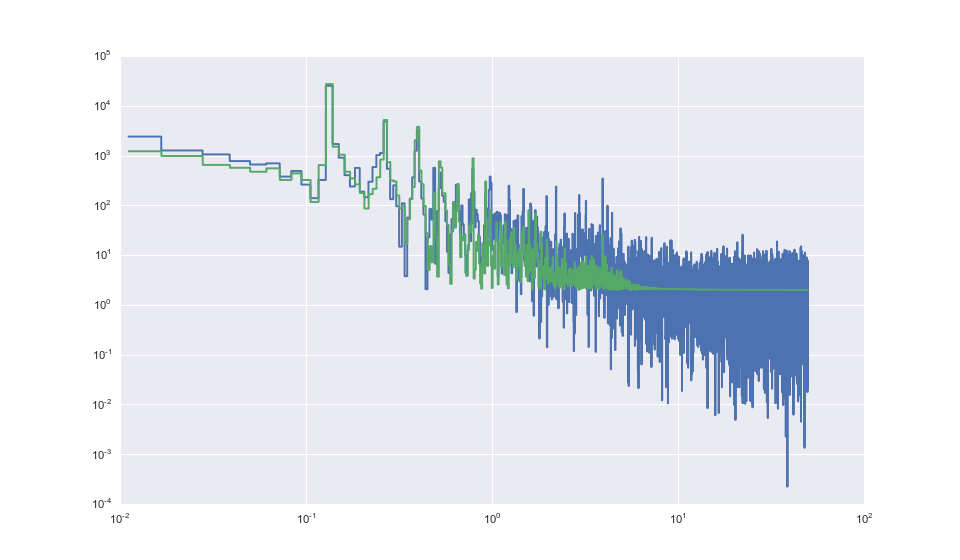

<IPython.core.display.Javascript object>


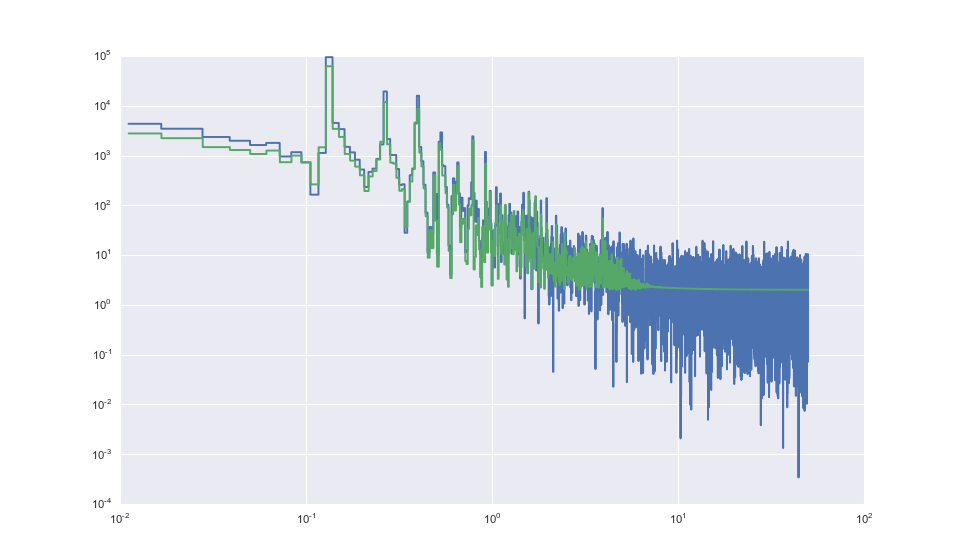

<IPython.core.display.Javascript object>


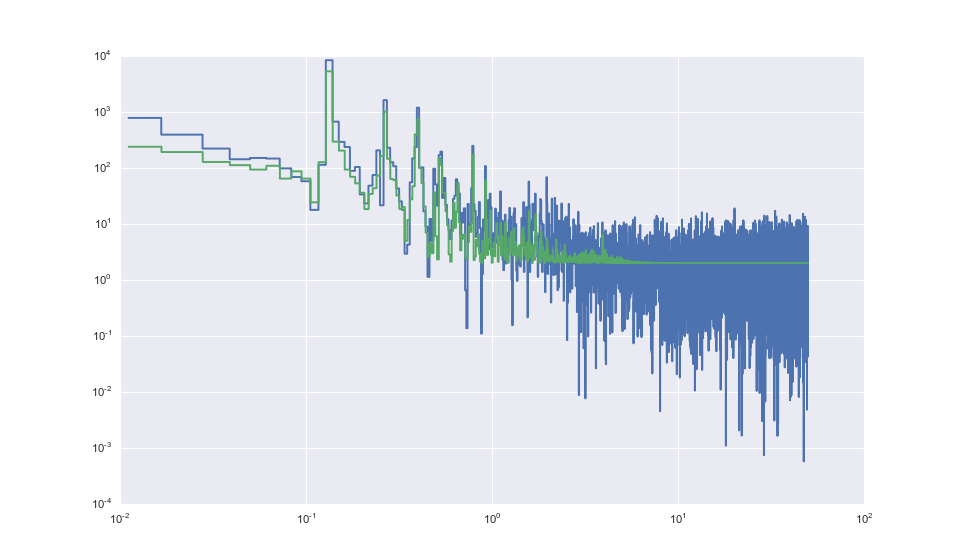

<IPython.core.display.Javascript object>


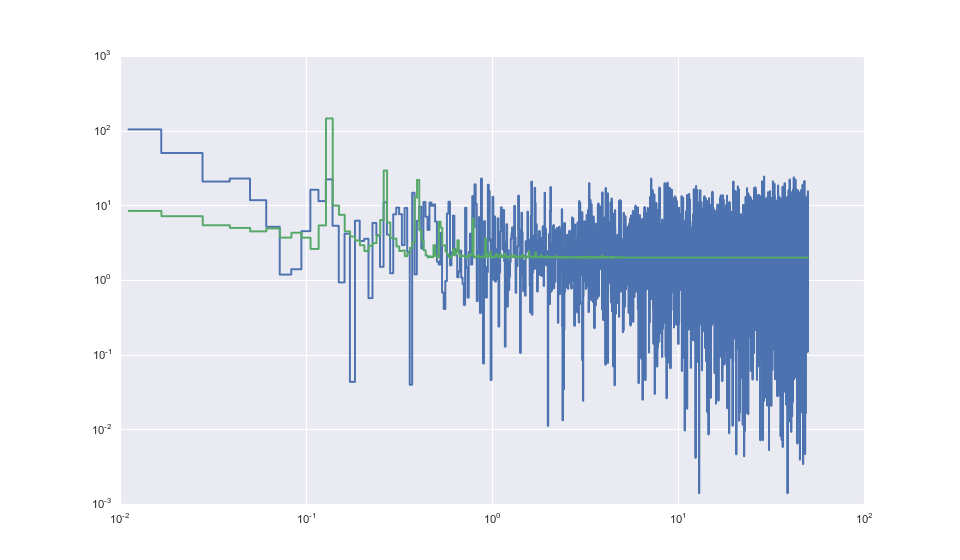

In [212]:
for ps, ps_sim in zip(ps_all, ps_sim_all):
    plt.figure(figsize=(12, 7))
    plt.loglog(ps.freq, ps.power, linestyle="steps-mid")
    plt.loglog(ps_sim.freq, ps_sim.power, linestyle="steps-mid")

Okay, now we can define a Posterior object to optimize for the amplitudes. We'll start with a model that has entirely independent amplitudes for each energy band:

In [213]:
class PSDPosterior(object):
    
    def __init__(self, ps_all, lc, energies, counts, bkg_counts, rebin_frac=0.1):
        
        # list of all power spectra objects
        self.ps_all = ps_all
        
        # light curve to use for making template
        self.lc = lc
        
        # associated energy bins
        self.energies = energies
        
        # total *source* counts in each energy bin
        self.counts = counts
        
        # total *background* counts in each energy bin
        self.bkg_counts = bkg_counts
        
        # the number of Lorentzians to be fit
        self.rebin_frac = rebin_frac
        
        # number of spectra
        self.nn = self.energies.shape[0]
        
        return
    
    def logprior(self, t0):
        """
        Each amplitude is independent, so we have self.nn parameters.
        We will put a normal prior centered on 1 on each parameter.
        """
        
        logpr = 0.0
        
        # amplitude hyperparameters
        amp_loc = 1.0 # mean of the Gaussian prior distribution
        amp_scale = 0.3 # scale of the Gaussian prior distribution
        amp_prior = scipy.stats.norm(loc=amp_loc, scale=amp_scale)
        
        for t in t0:
            logpr += amp_prior.logpdf(t)
            
        if not np.isfinite(logpr):
            return logmin
        else:
            return logpr


    def loglikelihood(self, t0, neg=False):
        """
        The log-likelihood for the model defined in self.model
        and the parameters in t0. Uses a $\Chi^2$ model for
        the uncertainty.

        Parameters:
        ------------
        t0: {list | numpy.ndarray}
            The list with parameters for the model

        Returns:
        --------
        logl: float
            The logarithm of the likelihood function for the model and
            parameters given.

        """

        # all mean models
        ps_sim_all = model_psd(self.lc, self.counts, self.bkg_counts, t0)
        #funcval_all = mean_model(self.ps_all[0].freq, self.energies, self.kk, t0)

        # initialize log-likelihood
        res = 0.0

        # run through all spectra and add log-likelihoods
        for i, (ps_sim, ps) in enumerate(zip(ps_sim_all, self.ps_all)):
            y = ps.power
            f = ps_sim.power
            res += -np.sum(np.log(f)) - np.sum(y/f)


        if not np.isfinite(res):
            res = logmin

        if neg:
            return -res
        else:
            return res
    
    def logposterior(self, t0, neg=False):
        lpost = self.loglikelihood(t0) + self.logprior(t0)
        if neg is True:
            return -lpost
        else:
            return lpost

    def __call__(self, t0, neg=False):
        return self.logposterior(t0, neg=neg)




In [220]:
lpost = PSDPosterior(ps_short_all, lc2, energies, counts, bkg_counts)

In [221]:
lpost([1,1,1,1])

-38856.658328898033

In [230]:
lpost([1,1,1,12.0])

-39571.372608995494

Optimization time:

In [248]:
theta_test = [1., 1., 1., 1.]

In [231]:
import scipy.optimize
opt = scipy.optimize.minimize(lpost, theta_test,
                              method="BFGS",
                              args=(True), tol=1.e-10)



In [232]:
opt.x

array([ 3.78790613,  1.47768468,  1.80557585,  1.6745496 ])

And let's try some MCMC:

In [259]:
import emcee

ndim = len(theta_test)
nwalkers = 20
burnin = 10
niter = 10

# sample random starting positions for each walker from
# a multivariate Gaussian
p0 = np.array([np.random.multivariate_normal(opt.x, opt.hess_inv) for
               i in range(nwalkers)])

# initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, lpost, args=[False],
                                threads=1)



In [261]:
import time as tsys

In [262]:
ts = tsys.clock()
# run the burn-in
pos, prob, state = sampler.run_mcmc(p0, burnin)

te = tsys.clock()

In [263]:
print(te-ts)

345.7549219999928


In [ ]:
sampler.reset()

# do the actual MCMC run
_, _, _ = sampler.run_mcmc(pos, niter, rstate0=state)





Let's look at the results:

Okay, so this is likely not going to work in the presence of a background!

Here's the problem:
- the emission is energy-dependent
- at higher energies, there are fewer source photons
- at higher energies, there is also more background
- what we are trying to discover is a *deviation* from the expectation of the amplitude in the pulse profile from that expected based on the spectrum
- however, this also depends on the basics of the space craft

I think the only way to solve this in Fourier space is by forward modeling and including the effect of the spectrum (ABC???).

There might also be a way to think about this in terms of absolute rms amplitude in the pulse profile. I.e. maybe the integral under the Lorentzians must be the same? I think this might be a worthwhile way to think about this. It should clearly not be the amplitude that is the same, but some kind of measure of variance.  

I think there might be a way to do this the time domain with GPs, but that'll still require a spectral model.

In either case, I think we'd need the expected *integrated photons* from the model, based on the spectrum of the entire tail of the Giant Flare, using the count-space spectrum (i.e. with the model having the responses applied).